In [2]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Modeling Tasks
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve


# Modeling
from sklearn.svm import SVC
 
# Evaluation the model  
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score ,auc ,f1_score ,roc_curve
from sklearn.metrics import precision_score, recall_score


In [4]:
#loading dataset
df = pd.read_csv("data.csv")


In [5]:
#exploring dataset
df['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
df.shape


(569, 33)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# describing the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [11]:
#Checking for missing values
df.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
# Deleting the id and Unnamed column

df= df.drop(['Unnamed: 32','id'],axis=1)


In [13]:
#Encoding categorical data
LEncoder = LabelEncoder()

df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])

In [14]:
# independent variables
x = df.drop('diagnosis',axis=1)
#dependent variables
y = df.diagnosis


In [15]:
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print ('Number of training samples input is', x_train.shape)
print ('Number of testing samples input is', x_test.shape)
print ('Number of training samples output is', y_train.shape)
print ('Number of testing samples output is', y_test.shape)

Number of training samples input is (455, 30)
Number of testing samples input is (114, 30)
Number of training samples output is (455,)
Number of testing samples output is (114,)


In [16]:
#Feature Scaling
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test= sc.transform(x_test)


In [17]:
# Support Vector classifier

svc = SVC(probability=True ,kernel='linear' ,C=20)

svc.fit(x_train,y_train)
print(svc.score(x_test, y_test))

y_pred = svc.predict(x_test)


0.9649122807017544


In [18]:
accuracy =accuracy_score(y_test, y_pred)
print('accuracy is:%0.2f'%accuracy)

precision =precision_score(y_test, y_pred)
print('precision is:%0.2f'%precision)

recall =recall_score(y_test, y_pred)
print('recall is:%0.2f'%recall)



accuracy is:0.96
precision is:0.93
recall is:0.98


In [19]:
#Classification Report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [22]:
#Confusion Matrix
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

confusion_mat= pd.DataFrame(cm, index = ['cancer', 'healthy'],columns =['predicted_cancer','predicted_healthy'])

confusion_mat

,predicted_cancer,predicted_healthy
cancer,42,1
healthy,3,68


<AxesSubplot:>

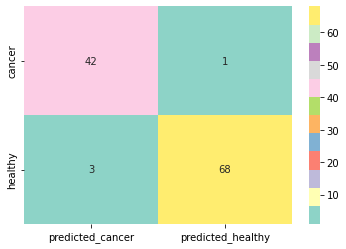

In [29]:
# visualization of Confusion Matrix

sns.heatmap(confusion_mat,annot=True,fmt='g',cmap='Set3')



In [30]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange' ,label='roc')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('reciver operating characteristic (roc) curve')
    plt.legend()
    plt.show()

In [32]:
y_score = svc.decision_function(x_test)

auc=roc_auc_score(y_test,y_score)
print('AUC:%0.2f'%auc)

AUC:0.99


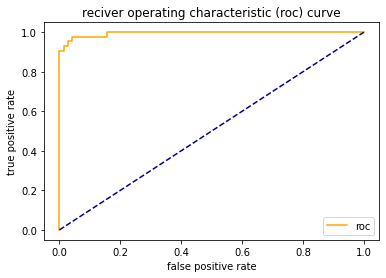

In [33]:
#The ROC Curve
fpr,tpr,thresholds=roc_curve(y_test,y_score)
plot_roc_curve(fpr,tpr)

In [38]:
#Area Under Curve
roc_auc_score(y_test, y_score)


0.9944317065181788

In [21]:
#cross validation
scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy') 
print(scores)
print(scores.mean())


[0.96491228 0.94736842 0.9122807  0.94736842 0.94736842 0.96491228
 0.94736842 0.94736842 0.96491228 0.96428571]
0.950814536340852


In [24]:
from sklearn.model_selection import learning_curve
train_sizes ,train_scores ,test_scores =learning_curve(svc, x, y, cv=10, scoring='accuracy' ,n_jobs=-1 ,train_sizes=np.linspace(0.01,1,50) ,verbose=1)

[learning_curve] Training set sizes: [  5  15  25  36  46  56  67  77  87  98 108 118 129 139 149 160 170 180
 191 201 212 222 232 243 253 263 274 284 294 305 315 325 336 346 356 367
 377 387 398 408 418 429 439 449 460 470 480 491 501 512]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 21.6min finished


In [25]:
train_mean =np.mean(train_scores , axis=1)


In [34]:
train_std =np.mean(train_scores , axis=1)


In [35]:
test_mean =np.mean(test_scores , axis=1)


In [36]:
test_std =np.mean(test_scores , axis=1)


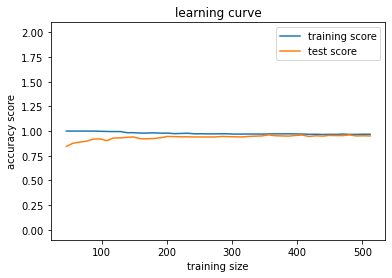

In [37]:
plt.plot(train_sizes , train_mean ,label='training score')
plt.plot(train_sizes , test_mean ,label='test score')

plt.fill_between(train_sizes-train_std , train_mean+train_std ,color='#ffffff' )
plt.fill_between(train_sizes-test_std , test_mean+test_std ,color='#ffffff' )

plt.title('learning curve')
plt.xlabel('training size')
plt.ylabel('accuracy score')
plt.legend(loc = 'best')